<a href="https://colab.research.google.com/github/Taraxidis/2025_A/blob/main/Phishing_URLs_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Παράδειγμα εντοπισμού phishing URLs με μεθόδους Μηχανικής Μάθησης**

*Συστήματα Τεχνητής Νοημοσύνης στην Κυβερνοασφάλεια*

## **Στόχος:**
Ένας ιστότοπος phishing είναι μια κοινή μέθοδος κοινωνικής μηχανικής που μιμείται αξιόπιστες ιστοσελίδες με σκοπό την εξαπάτηση. Ο στόχος αυτού του παραδείγματος είναι να εκπαιδεύσει μοντέλα ΜΜ σε ένα κατάλληλο σύνολο δεδομένων που δημιουργήθηκε για την πρόβλεψη ιστοτόπων ηλεκτρονικού ψαρέματος (phishing). Το σύνολο περιλαμβάνει διευθύνσεις phishing όσο και οι καλοήθεις διευθύνσεις ιστότοπων. Έχει γίνει η κατάλληλη εξαγωγή χαρακτηριστικών (features extraction) από λειτουργίες που βασίζονται στο περιεχόμενο του κάθε ιστότοπου, προκειμένου το σύνολο να είναι κατάλληλο να εκπαιδεύσει μοντέλα ΜΜ ώστε να μπορούν να εντοπίσουν εάν ένας ιστότοπος είναι ή όχι επιβλαβής (phishing ή όχι).

*Google Collaboratory*<br>
*Παράδειγμα χρήσης μεθόδων ΜΜ στην επίλυση ενός προβλήματος κυβερνοασφάλειας*

## **Εισαγωγή Βιβλιοθηκών - Πακέτων:**

Γίνεται εισαγωγή των κατάλληλων βιβλιοθηκών - πακέτων της Python για την εκτέλεση του παραδείγματος.

In [1]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Σύνολο Δεδομένων:**

Το σύνολο δεδομένων το οποίο εμπεριέχεται σε ένα csv αρχείο, περιλαμβάνει 10000 περιπτώσεις (instances), από τις οποίες οι 5000 περιπτώσεις είναι phishing URLs και οι υπόλοιπες 5000 καλοήθεις.

Το σύνολο δεδομένων υπάρχει ως αρχείο csv στην θέση [/EKPA/Data/phishing_dataset.csv](https://github.com/kdemertzis/EKPA/blob/main/Data/phishing_dataset.csv)

In [2]:
#εισαγωγή του συνόλου δεδομένων
data0 = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/phishing_dataset.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


## **Έλεγχος Δεδομένων**
Σε αυτό το βήμα, πραγματοποιούνται κάποιες μέθοδοι ελέγχου για την εξέταση των δεδομένων και των χαρακτηριστικών τους.

In [3]:
#έλεγχος του σχήματος του συνόλου δεδομένων
data0.shape

(10000, 18)

In [4]:
#εξέταση των χαρακτηριστικών του συνόλου δεδομένων
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
#πληροφορίες για τα χαρακτηριστικά του συνόλου δεδομένων
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## **Οπτικοποίηση Δεδομένων**
Πραγματοποιείται οπτικοποίηση μέσω γραφημάτων για τον οπτικό προσδιορισμό του πώς κατανέμονται τα δεδομένα και πώς σχετίζονται τα χαρακτηριστικά μεταξύ τους.

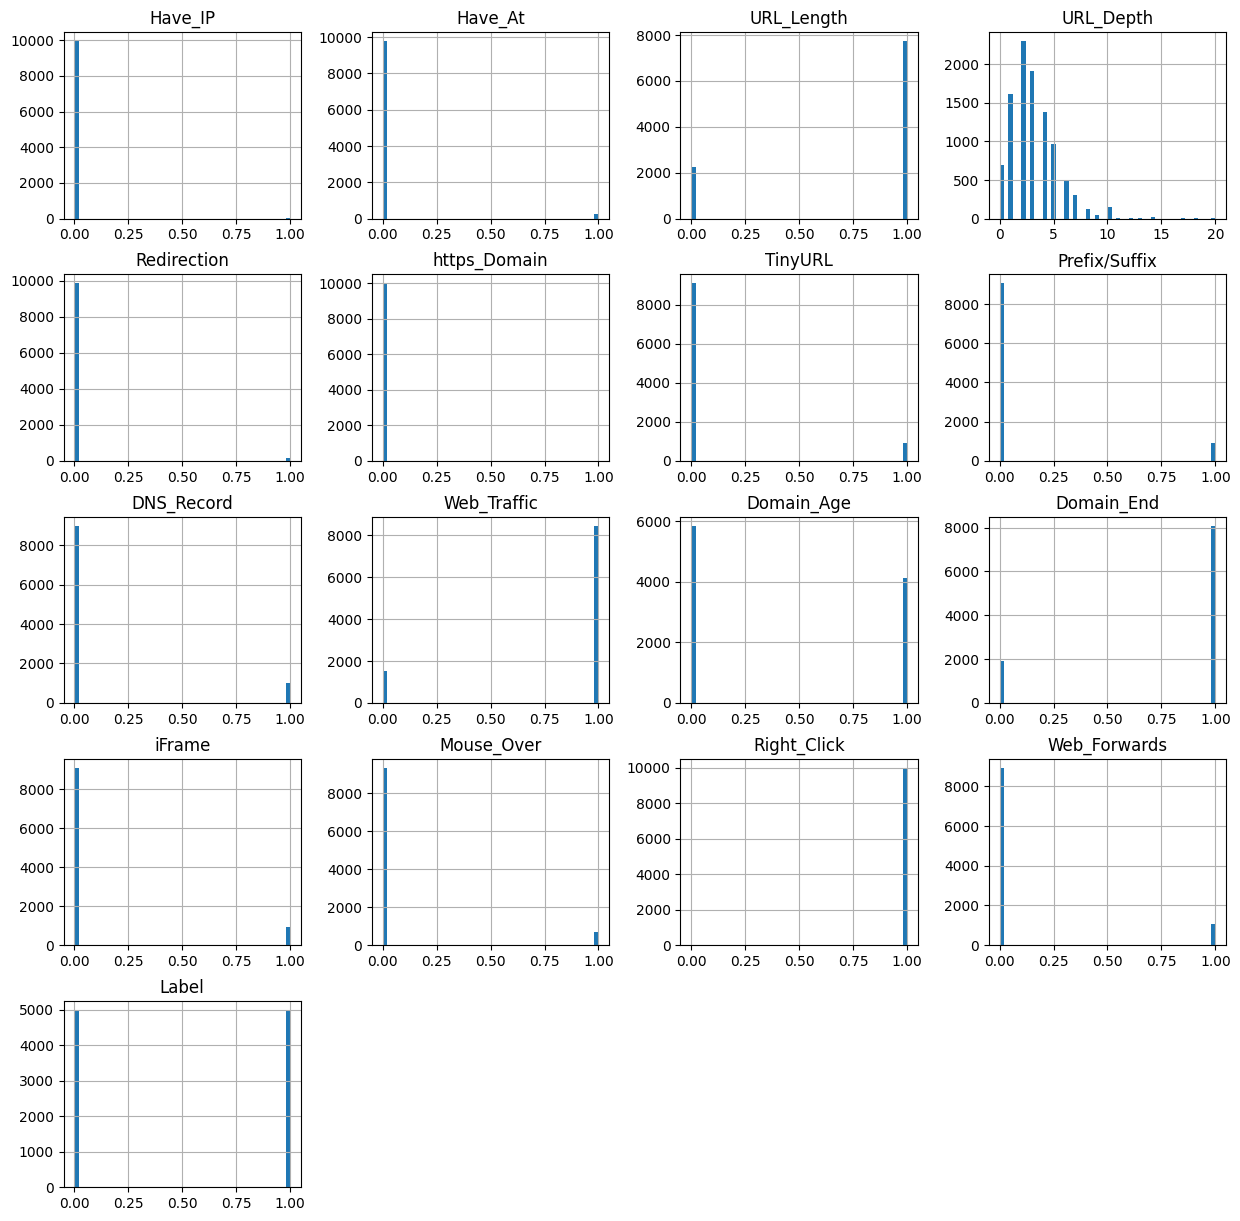

In [6]:
#οπτικοποίηση της κατανομής των δεδομένων
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [10]:
#πίνακας συσχέτισης χαρακτηριστικών του συνόλου δεδομένων
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

ValueError: could not convert string to float: 'graphicriver.net'

<Figure size 1500x1300 with 0 Axes>

## **Προεπεξεργασία Δεδομένων και Διερευνητική Ανάλυση Δεδομένων**
Καθαρισμός δεδομένων εφαρμόζοντας τεχνικές προεπεξεργασίας και μετατροπή τους σε κατάλληλη μορφοποίηση ώστε να χρησιμοποιηθούν από τα μοντέλα ΜΜ.

In [11]:
#περιγραφικά στατιστικά µέτρα του συνόλου δεδομένων
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


Τα παραπάνω στατιστικά στοιχεία δείχνουν ότι τα περισσότερα από τα δεδομένα αποτελούνται από 0 και 1 εκτός από τις στήλες "Domain" και "URL_Depth". Η στήλη Domain δεν έχει καμία αξία για την εκπαίδευση του μοντέλου ΜΜ, οπότε μπορεί να γίνει απόρριψη της στήλης από το σύνολο δεδομένων. Αντίθετα, δεν υπάρχει ανάγκη αλλαγής ή απόρριψης της στήλης "URL_Depth".

In [12]:
#απόρριψη της στήλης Domain από το σύνολο δεδομένων
data = data0.drop(['Domain'], axis = 1).copy()

Μετά την παραπάνω απόρριψη το σύνολο αποτελείται από 16 ανεξάρτητες μεταβλητές και μια μεταβλητή στόχο (εξαρτημένη μεταβλητή).

In [13]:
#έλεγχος των δεδομένων για κενές ή ελλείπουσες τιμές
data.isnull().sum()

,0
Have_IP,0
Have_At,0
URL_Length,0
URL_Depth,0
Redirection,0
https_Domain,0
TinyURL,0
Prefix/Suffix,0
DNS_Record,0
Web_Traffic,0


Προκειμένου να εξομαλυνθεί η διαδικασίας της τμηματοποίησης, τα δεδομένα ανακατεύονται προκειμένου να αποφεύγει η περίπτωση υπερβολικής τοποθέτησης (overfitting) κατά την εκπαίδευση των μοντέλων. Ανακατεύοντας τις σειρές στο σύνολο δεδομένων, εξασφαλίζεται ότι κατά τον διαχωρισμό τα σύνολα εκπαίδευσης και δοκιμών κατανέμονται αντικειμενικά.

In [14]:
# ανακάτεμα δεδομένων
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1
1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1,1
2,0,0,1,5,0,0,0,0,0,1,0,0,0,0,1,0,1
3,0,0,1,2,0,0,0,0,0,1,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1


Τα δεδομένα είναι πλέον έτοιμα για την εκπαίδευση των μοντέλων ΜΜ.

## **Τμηματοποίηση Δεδομένων**

In [15]:
#διαχωρισμός και εκχώρηση ανεξάρτητων μεταβλητών σε X και μεταβλητών στόχων σε y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [16]:
#τμηματοποίηση δεδομένων σε σύνολο εκπαίδευσης με 80% και σύνολο δοκιμών με 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

## **Μοντέλα ΜΜ και Διαδικασία Εκπαίδευσης**

Από το παραπάνω σύνολο δεδομένων, είναι σαφές ότι πρόκειται για μια εποπτευόμενη εργασία ΜΜ (supervised learning). Συγεκριμένα, το πρόβλημα το οποίο εξετάζεται, αντιμετωπίζεται ως πρόβλημα ταξινόμησης (classification), καθώς η κάθε περίπτωση (διεύθυνση URL εισόδου) ταξινομείται ως phishing (1) ή ως νόμιμη (0).
Στην περίπτωση χρήσης που εξετάζεται, χρησιμοποιούνται οι παρακάτω αλγόριθμοι ταξινόμησης ως εποπτευόμενα μοντέλα ΜΜ:

* Decision Tree
* Random Forest
* Support Vector Machines
* Multilayer Perceptrons


In [17]:
#εισαγωγή πακέτων
from sklearn.metrics import accuracy_score

In [19]:
#δημιουργία αποθετηρίων για την αποθήκευση των αποτελεσμάτων απόδοσης των μοντέλων
ML_Model = []
acc_train = []
acc_test = []

#συναρτηση κλήσης για αποθήκευση των αποτελεσμάτων
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **Decision Tree**
 Decision Tree (δέντρο αποφάσεων). Είναι ένας μη παραμετρικός εποπτευόμενος αλγόριθμος μάθησης, ο οποίος έχει μια ιεραρχική, δεντρική δομή, η οποία αποτελείται από έναν κόμβο ρίζας, κλάδους, εσωτερικούς κόμβους και κόμβους φύλλων. Ο αλγόριθμος αναζητά όλες τις πιθανές δοκιμές και βρίσκει αυτό που είναι πιο κατατοπιστικό για τη μεταβλητή στόχο.

In [20]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

#παρουσίαση μοντέλου
tree = DecisionTreeClassifier(max_depth = 5)
#έλεγχος καταλληλότητας μοντέλου
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
#πρόβλεψη της τιμής στόχου από το μοντέλο
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Αξιολόγηση Απόδοσης:**

In [22]:
#πολογισμός της ακρίβειας του μοντέλου
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.813
Decision Tree: Accuracy on test Data: 0.813


**Αποθήκευση Αποτελεσμάτων:**

In [23]:
#αποθήκευση αποτελεσμάτων
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **Random Forest**
Random Forest (τυχαίο δάσος). Είναι ένας ευρέως χρησιμοποιούμενος αλγόριθμος ΜΜ, ο οποίος συνδυάζει την έξοδο πολλαπλών δέντρων αποφάσεων για να φτάσει σε ένα μόνο αποτέλεσμα. Κάθε δέντρο μπορεί να κάνει μια σχετικά καλή δουλειά στην πρόβλεψη, αλλά πιθανότατα θα υπερισχύσει σε κάποιο μέρος των δεδομένων. Εάν χτίσουμε πολλά δέντρα, τα οποία λειτουργούν καλά και προσαρμόζονται με διαφορετικούς τρόπους, μπορούμε να μειώσουμε την ποσότητα της υπερπροσαρμογής (overfitting) υπολογίζοντας τον μέσο όρο των αποτελεσμάτων τους.

In [24]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

#παρουσίαση μοντέλου
forest = RandomForestClassifier(max_depth=5)

#έλεγχος καταλληλότητας μοντέλου
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [25]:
#πρόβλεψη της τιμής στόχου από το μοντέλο
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Αξιολόγηση Απόδοσης:**

In [26]:
#υπολογισμός της ακρίβειας του μοντέλου
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.818
Random forest: Accuracy on test Data: 0.816


**Αποθήκευση Αποτελεσμάτων:**

In [27]:
#αποθήκευση αποτελεσμάτων
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.6. Support Vector Machines**

Support Vector Machines - SVM (μηχανή διανυσμάτων υποστήριξης). Πρόκειται για έναν αλγόριθμο ο οποίος εκτελώντας βέλτιστους μετασχηματισμούς δεδομένων που καθορίζουν τα όρια μεταξύ σημείων δεδομένων με βάση προκαθορισμένες κλάσεις, ετικέτες ή εξόδους, μπορεί να επιλύσει προβλήματα εποπτευόμενης ΜΜ. Ο αλγόριθμος δημιουργεί ένα μοντέλο που εκχωρεί νέα παραδείγματα στη μία ή στην άλλη κατηγορία, καθιστώντας τον, έναν μη πιθανολογικό δυαδικό γραμμικό ταξινομητή.

In [28]:
#Support vector machine algorithm
from sklearn.svm import SVC

#παρουσίαση μοντέλου
svm = SVC(kernel='linear', C=1.0, random_state=12)
#έλεγχος καταλληλότητας μοντέλου
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [29]:
#πρόβλεψη της τιμής στόχου από το μοντέλο
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Αξιολόγηση Απόδοσης:**

In [30]:
#υπολογισμός της ακρίβειας του μοντέλου
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.804
SVM : Accuracy on test Data: 0.793


**Αποθήκευση Αποτελεσμάτων:**

In [31]:
#αποθήκευση αποτελεσμάτων
storeResults('SVM', acc_train_svm, acc_test_svm)

### **Multilayer Perceptrons**
Multilayer Perceptrons (πολυστρωματικό νευρωνικό δίκτυο). Πρόκειται για τεχνητό νευρωνικό δίκτυο, το οποίο χρησιμοποιείται και ως νευρωνικό δίκτυο βαθιάς μάθησης, αποτελούμενο από πλήρως συνδεδεμένους νευρώνες με μη γραμμικό είδος συνάρτησης ενεργοποίησης, οργανωμένο σε τουλάχιστον τρία επίπεδα. Τα δίκτυα αυτά μπορεί να θεωρηθούν και ως γενικεύσεις γραμμικών μοντέλων που εκτελούν πολλαπλά στάδια επεξεργασίας για να καταλήξουν σε μια απόφαση.

In [32]:
# Multilayer Perceptrons Algorithm
from sklearn.neural_network import MLPClassifier

#παρουσίαση μοντέλου
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

#έλεγχος καταλληλότητας μοντέλου
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [34]:
#πρόβλεψη της τιμής στόχου από το μοντέλο
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Αξιολόγηση Απόδοσης:**

In [35]:
#υπολογισμός της ακρίβειας του μοντέλου
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.864
Multilayer Perceptrons: Accuracy on test Data: 0.852


**Αποθήκευση Αποτελεσμάτων:**

In [36]:
#αποθήκευση αποτελεσμάτων
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **Σύγκριση Μοντέλων**
Δημιουργία ενός πλαισίου δεδομένων (dataframe) για την σύγκριση της απόδοσης των μοντέλων.

In [37]:
#δημιουργία πλαισίου δεδομένων (dataframe)
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.813,0.813
1,Random Forest,0.818,0.816
2,SVM,0.804,0.793
3,Multilayer Perceptrons,0.864,0.852


In [38]:
#ταξινόμηση του πλαισίου δεδομένων (dataframe) με βάση την ακρίβεια (Accuracy) των μοντέλων
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,Multilayer Perceptrons,0.864,0.852
1,Random Forest,0.818,0.816
0,Decision Tree,0.813,0.813
2,SVM,0.804,0.793


from matplotlib import pyplot as plt
_df_0['Train Accuracy'].plot(kind='hist', bins=20, title='Train Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Test Accuracy'].plot(kind='hist', bins=20, title='Test Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('ML Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Train Accuracy', y='Test Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Train Accuracy'].plot(kind='line', figsize=(8, 4), title='Train Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Test Accuracy'].plot(kind='line', figsize=(8, 4), title='Test Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['ML Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='Train Accuracy', y='ML Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['ML Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Test Accuracy', y='ML Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Για την παραπάνω σύγκριση, είναι σαφές ότι ο ταξινομητής MLP λειτουργεί εποτελεσματικότερα γι αυτό το σύνολο δεδομένων.